**Loading Data**

In [1]:
import os
import pickle
import numpy as np

# Path to the folder containing Pickle files
data_folder = r"D:\signal processing\pickle files"

# Lists to store ECG signals and corresponding labels
ecg_signals = []
labels_list = []

# Loop through all files in the folder
for filename in os.listdir(data_folder):
    if filename.endswith(".pkl"):  # Ensure it's a Pickle file
        file_path = os.path.join(data_folder, filename)

        with open(file_path, "rb") as file:
            data = pickle.load(file, encoding="latin1")

            # Extract ECG signal and labels
            ecg_signal = data["signal"]["chest"]["ECG"]  # Adjust key based on data structure
            labels = data["label"]

            # Convert ECG signal to 1D array
            ecg_signal = ecg_signal.flatten()
            labels = labels.flatten()

            # Store the data
            ecg_signals.append(ecg_signal)
            labels_list.append(labels)

# Print the number of loaded ECG files
print(f"Loaded {len(ecg_signals)} ECG files.")


Loaded 15 ECG files.


**ECG_Labels_Distribution**

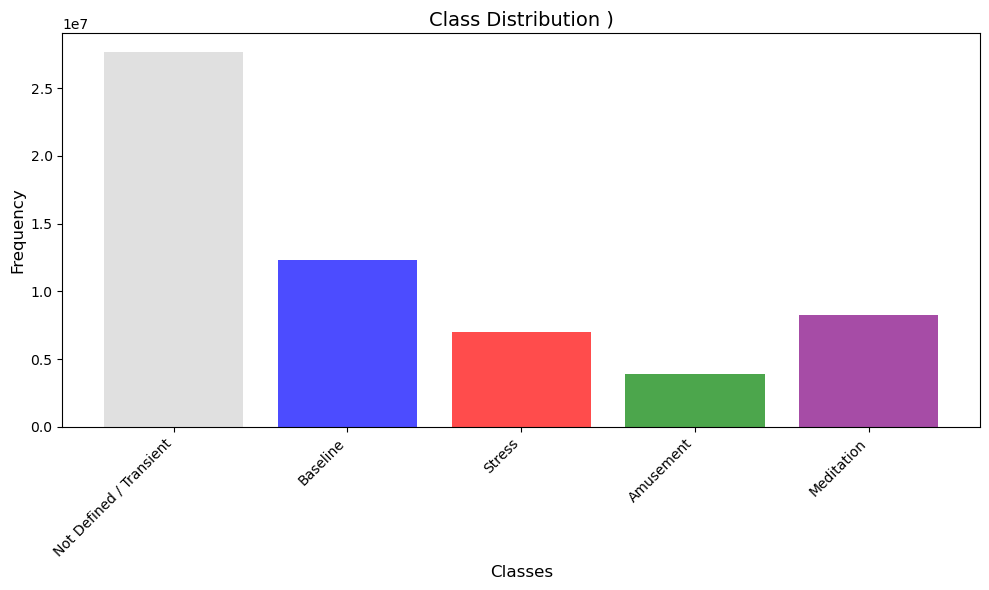

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the list of labels to get the overall distribution
all_labels = np.concatenate(labels_list)

# Count the occurrences of each label
unique_labels, counts = np.unique(all_labels, return_counts=True)

# Map the labels to their respective names
label_names = {
    0: "Not Defined / Transient",
    1: "Baseline",
    2: "Stress",
    3: "Amusement",
    4: "Meditation",
    5: "Should be Ignored",
    6: "Should be Ignored",
    7: "Should be Ignored"
}

# Assign colors to each class for better visualization
colors = {
    0: 'lightgray',  # Transient/Not Defined
    1: 'blue',       # Baseline
    2: 'red',        # Stress
    3: 'green',      # Amusement
    4: 'purple',     # Meditation
    5: 'black',      # Should be ignored
    6: 'black',      # Should be ignored
    7: 'black'       # Should be ignored
}

# Plot the distribution of labels with appropriate colors
plt.figure(figsize=(10, 6))

# Filter out the "should be ignored" classes (5, 6, 7)
valid_labels = [label for label in unique_labels if label not in [5, 6, 7]]
valid_counts = [counts[np.where(unique_labels == label)[0][0]] for label in valid_labels]

# Assign colors only for valid labels
valid_colors = [colors[label] for label in valid_labels]

plt.bar(valid_labels, valid_counts, color=valid_colors, alpha=0.7)

# Add title and labels
plt.title("Class Distribution )", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(valid_labels, [label_names[label] for label in valid_labels], rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



**Exploring Label Shape**

In [5]:
for i, (ecg, labels) in enumerate(zip(ecg_signals, labels_list)):
    print(f"Subject {i+1}: ECG Shape = {ecg.shape}, Labels Shape = {labels.shape}")


Subject 1: ECG Shape = (3847200,), Labels Shape = (3847200,)
Subject 2: ECG Shape = (3663100,), Labels Shape = (3663100,)
Subject 3: ECG Shape = (3875900,), Labels Shape = (3875900,)
Subject 4: ECG Shape = (3883600,), Labels Shape = (3883600,)
Subject 5: ECG Shape = (3676400,), Labels Shape = (3676400,)
Subject 6: ECG Shape = (3941700,), Labels Shape = (3941700,)
Subject 7: ECG Shape = (4144000,), Labels Shape = (4144000,)
Subject 8: ECG Shape = (4255300,), Labels Shape = (4255300,)
Subject 9: ECG Shape = (4545100,), Labels Shape = (4545100,)
Subject 10: ECG Shape = (4496100,), Labels Shape = (4496100,)
Subject 11: ECG Shape = (4380600,), Labels Shape = (4380600,)
Subject 12: ECG Shape = (4949700,), Labels Shape = (4949700,)
Subject 13: ECG Shape = (3666600,), Labels Shape = (3666600,)
Subject 14: ECG Shape = (3826200,), Labels Shape = (3826200,)
Subject 15: ECG Shape = (3656100,), Labels Shape = (3656100,)


**Labels**

In [7]:
import numpy as np

# Get unique labels from all subjects
unique_labels = np.unique(np.concatenate(labels_list))

print("Unique Labels:", unique_labels)


# Labels to remove
labels_to_remove = {0, 5, 6, 7}

# Lists to store filtered data
filtered_ecg_signals = []
filtered_labels_list = []

# Counter for removed samples
removed_samples = 0

# Filter ECG signals and labels
for ecg, labels in zip(ecg_signals, labels_list):
    mask = np.isin(labels, list(labels_to_remove), invert=True)  # Mask for keeping only desired labels
    filtered_ecg = ecg[mask]
    filtered_labels = labels[mask]
    
    removed_samples += len(labels) - len(filtered_labels)  # Count removed samples

    filtered_ecg_signals.append(filtered_ecg)
    filtered_labels_list.append(filtered_labels)

# Get unique labels after filtering
unique_labels_after = np.unique(np.concatenate(filtered_labels_list))

# Print results
print("Unique Labels After Filtering:", unique_labels_after)
print(f"Total Removed Samples: {removed_samples}")


# Define stress label (e.g., assuming label '2' represents stress)
stress_label = 2  

# Convert labels to binary classification and count samples
binary_labels_list = [np.where(labels == stress_label, 1, 0) for labels in labels_list]

# Concatenate all labels to count occurrences
all_binary_labels = np.concatenate(binary_labels_list)

# Count occurrences of each class (0 = No Stress, 1 = Stress)
unique_labels, counts = np.unique(all_binary_labels, return_counts=True)

# Print results
print("Unique Labels After Binary Conversion:", unique_labels)
print("Number of Samples Per Class:")
for label, count in zip(unique_labels, counts):
    print(f"Class {label}: {count} samples")



Unique Labels: [0 1 2 3 4 5 6 7]
Unique Labels After Filtering: [1 2 3 4]
Total Removed Samples: 29336997
Unique Labels After Binary Conversion: [0 1]
Number of Samples Per Class:
Class 0: 53831399 samples
Class 1: 6976201 samples


**Histogram of Data distribution**

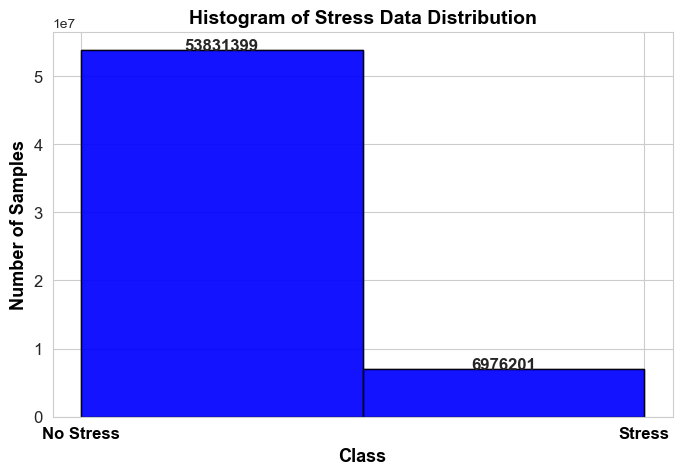

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# تحويل الليبلز إلى مصفوفة موحدة
binary_labels = np.concatenate(binary_labels_list)

# ضبط الـ Style ليكون عصريًا
sns.set_style("whitegrid")

# رسم الهستوجرام باستخدام Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(binary_labels, bins=2, kde=False, edgecolor='black', color="blue")  # ✅ إزالة palette

# تحسين مظهر الرسم
plt.xticks([0, 1], ['No Stress', 'Stress'], fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12)
plt.xlabel("Class", fontsize=13, fontweight='bold', color='black')
plt.ylabel("Number of Samples", fontsize=13, fontweight='bold', color='black')
plt.title("Histogram of Stress Data Distribution", fontsize=14, fontweight='bold', color='black')

# إضافة أرقام لكل عمود
counts, bins, patches = plt.hist(binary_labels, bins=2, color="blue", alpha=0.7, edgecolor='black')  # ✅ لون واحد فقط
for patch, count in zip(patches, counts):
    plt.text(patch.get_x() + patch.get_width() / 2, count + 1000, f'{int(count)}', ha='center', fontsize=12, fontweight='bold')

# عرض الجراف
plt.show()


**Data Distrubtion**

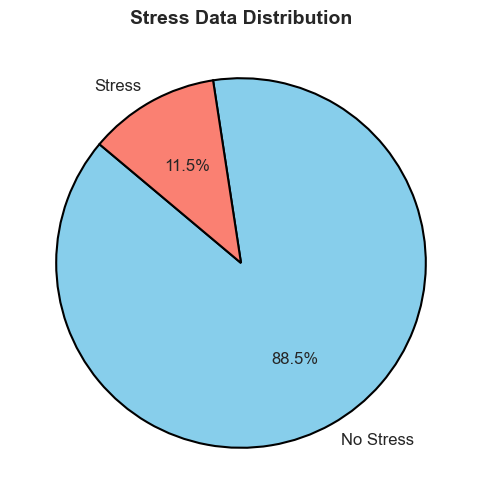

In [12]:
import matplotlib.pyplot as plt


labels = ['No Stress', 'Stress']
counts = [53831399, 6976201]
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, textprops={'fontsize': 12})

plt.title("Stress Data Distribution", fontsize=14, fontweight='bold')

# عرض المخطط
plt.show()


**Orginal ECG Signal Display**

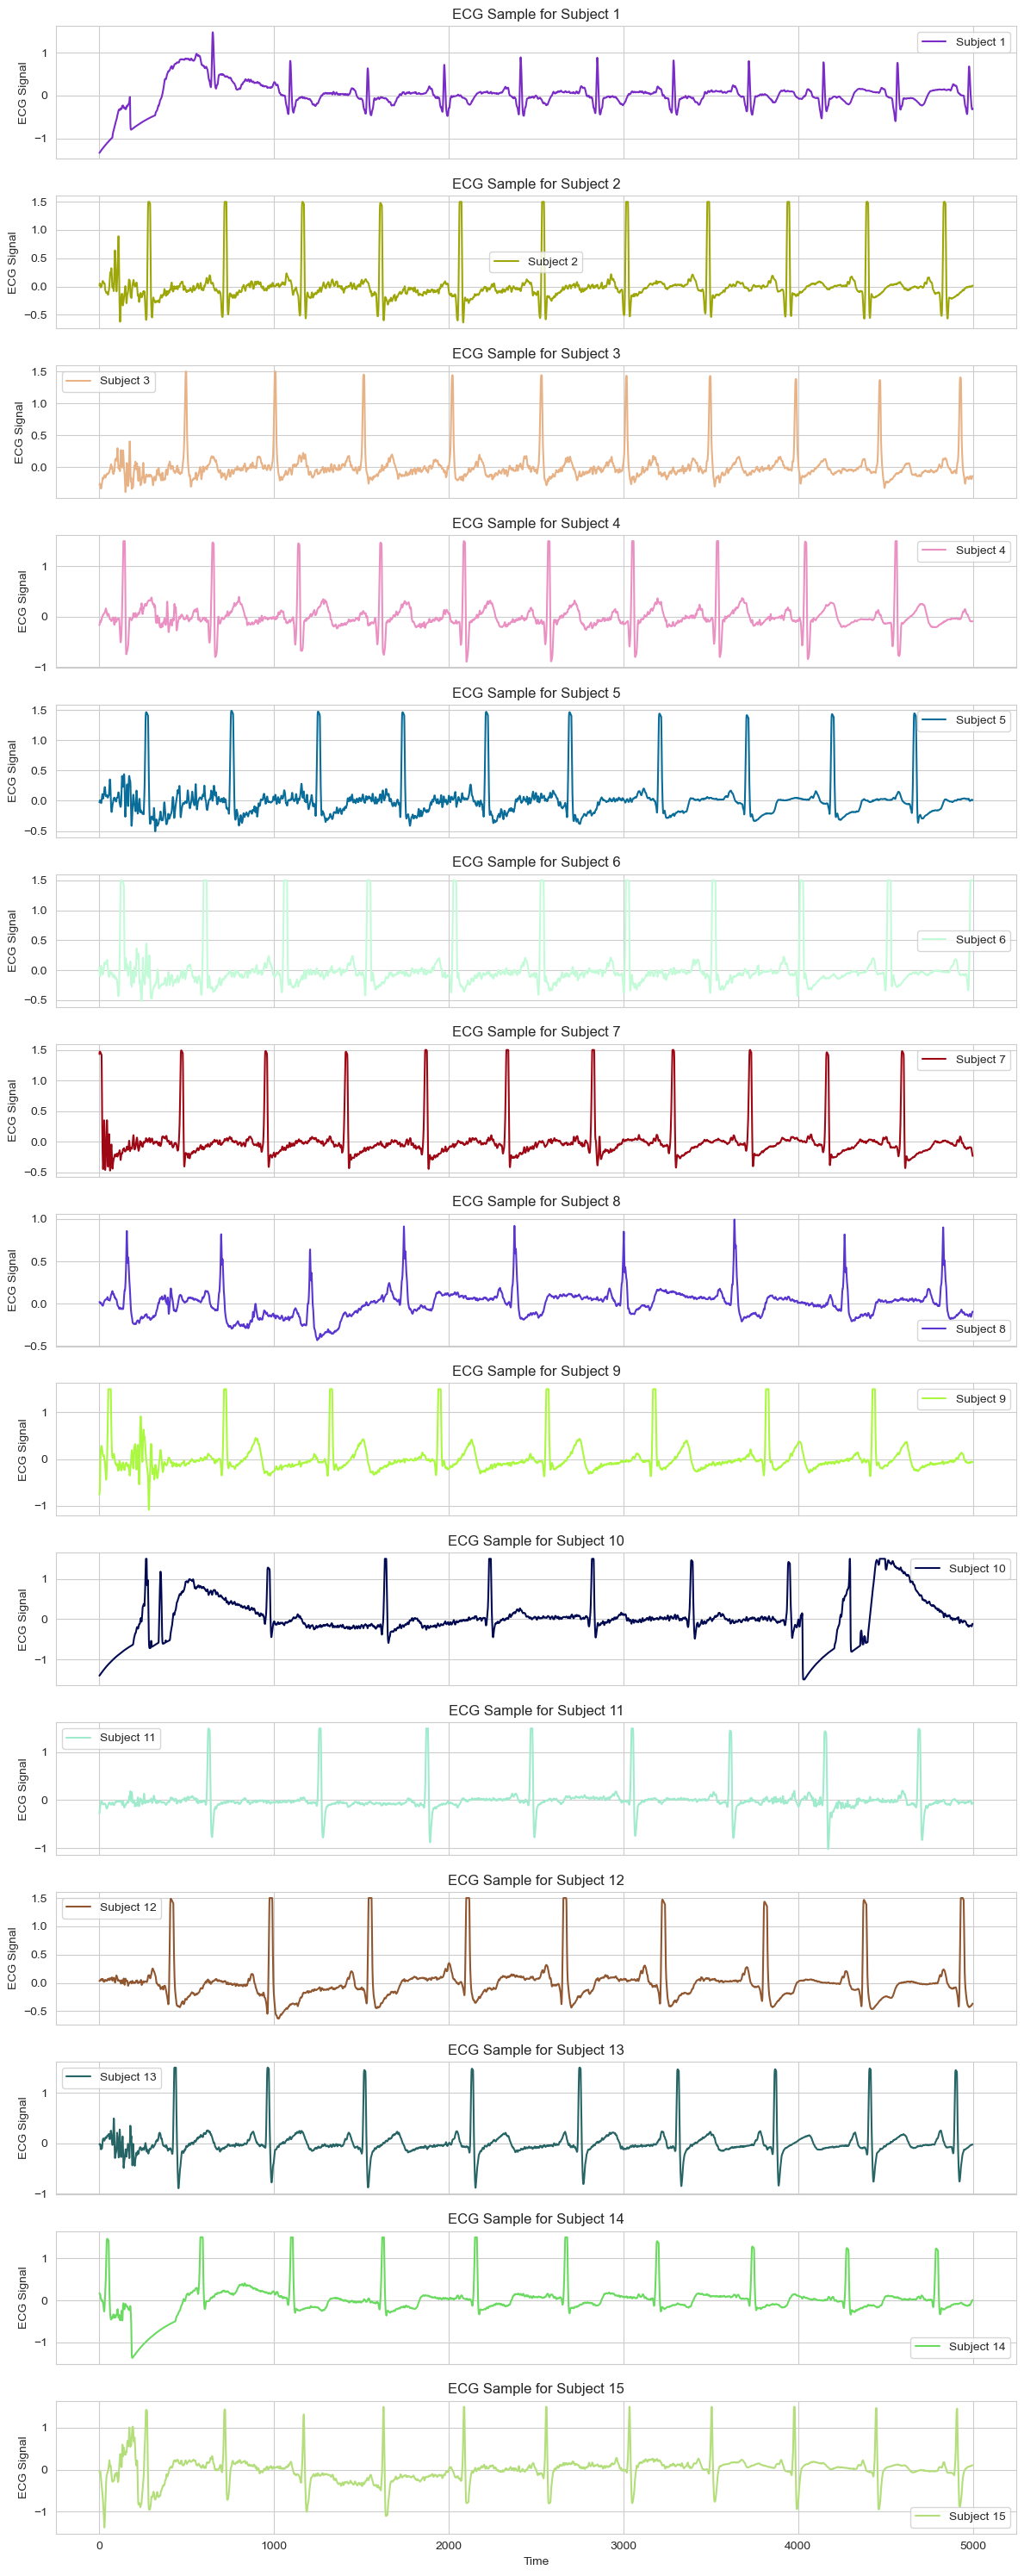

In [15]:
import numpy as np
import matplotlib.pyplot as plt


num_subjects = len(ecg_signals)


sample_size = 5000  


fig, axes = plt.subplots(num_subjects, 1, figsize=(12, num_subjects * 2), sharex=True)


if num_subjects == 1:
    axes = [axes]


for i, (ecg_signal, ax) in enumerate(zip(ecg_signals, axes)):
    sample_ecg = ecg_signal[:sample_size]  # استخراج عينة من الإشارة
    ax.plot(sample_ecg, label=f'Subject {i+1}', color=np.random.rand(3,))  # استخدام لون عشوائي لكل خط
    ax.set_ylabel("ECG Signal")
    ax.set_title(f"ECG Sample for Subject {i+1}")
    ax.legend()


axes[-1].set_xlabel("Time")


plt.tight_layout()
plt.show()


**Sampling Consistency Verification**

In [18]:
import numpy as np
expected_sampling_rate = 700  # Hz

recording_durations = [data.shape[0] / expected_sampling_rate for data in ecg_signals]

for i, duration in enumerate(recording_durations, start=1):
    actual_sampling_rate = ecg_signals[i-1].shape[0] / duration
    print(f"Subject {i}: Sampling Rate = {actual_sampling_rate:.2f} Hz")

 
    if not np.isclose(actual_sampling_rate, expected_sampling_rate, atol=1):
        print(f"⚠️ Warning: Subject {i} has an unexpected sampling rate!")



Subject 1: Sampling Rate = 700.00 Hz
Subject 2: Sampling Rate = 700.00 Hz
Subject 3: Sampling Rate = 700.00 Hz
Subject 4: Sampling Rate = 700.00 Hz
Subject 5: Sampling Rate = 700.00 Hz
Subject 6: Sampling Rate = 700.00 Hz
Subject 7: Sampling Rate = 700.00 Hz
Subject 8: Sampling Rate = 700.00 Hz
Subject 9: Sampling Rate = 700.00 Hz
Subject 10: Sampling Rate = 700.00 Hz
Subject 11: Sampling Rate = 700.00 Hz
Subject 12: Sampling Rate = 700.00 Hz
Subject 13: Sampling Rate = 700.00 Hz
Subject 14: Sampling Rate = 700.00 Hz
Subject 15: Sampling Rate = 700.00 Hz


**Window Segementation and Subject-wise Validation**

In [21]:
import numpy as np

# Define window size and step size
window_size = 210000  # Number of samples per window
step_size = 7000  # Step size (overlap = 96.67%)

# Function to apply sliding window to ECG data
def apply_sliding_window(ecg_data, window_size, step_size):
    windows = []
    num_samples = len(ecg_data)

    for start in range(0, num_samples - window_size + 1, step_size):
        window = ecg_data[start:start + window_size]
        windows.append(window)

    return np.array(windows)

# Example: Apply sliding window to ECG data for each subject
ecg_windows_list = [apply_sliding_window(ecg_data, window_size, step_size) for ecg_data in ecg_signals]

# Check the number of windows generated for each subject
for i, ecg_windows in enumerate(ecg_windows_list, start=1):
    print(f"Subject {i}: Number of windows = {ecg_windows.shape[0]}")


Subject 1: Number of windows = 520
Subject 2: Number of windows = 494
Subject 3: Number of windows = 524
Subject 4: Number of windows = 525
Subject 5: Number of windows = 496
Subject 6: Number of windows = 534
Subject 7: Number of windows = 563
Subject 8: Number of windows = 578
Subject 9: Number of windows = 620
Subject 10: Number of windows = 613
Subject 11: Number of windows = 596
Subject 12: Number of windows = 678
Subject 13: Number of windows = 494
Subject 14: Number of windows = 517
Subject 15: Number of windows = 493


**Labeling Windows**

In [24]:
import numpy as np

window_size = 210000
stride = 7000

binary_labels_windowed = []

for labels in binary_labels_list:
    windowed_labels = [labels[i:i + window_size].mean().round() for i in range(0, len(labels) - window_size + 1, stride)]
    binary_labels_windowed.append(windowed_labels)


for i, labels in enumerate(binary_labels_windowed):
    print(f"Subject {i+1}: Number of windowed labels = {len(labels)}")


Subject 1: Number of windowed labels = 520
Subject 2: Number of windowed labels = 494
Subject 3: Number of windowed labels = 524
Subject 4: Number of windowed labels = 525
Subject 5: Number of windowed labels = 496
Subject 6: Number of windowed labels = 534
Subject 7: Number of windowed labels = 563
Subject 8: Number of windowed labels = 578
Subject 9: Number of windowed labels = 620
Subject 10: Number of windowed labels = 613
Subject 11: Number of windowed labels = 596
Subject 12: Number of windowed labels = 678
Subject 13: Number of windowed labels = 494
Subject 14: Number of windowed labels = 517
Subject 15: Number of windowed labels = 493


**Processing ECG signals by Filtering, Extracting R-peaks, and Normalizing**

In [27]:
import numpy as np
import biosppy.signals.ecg as ecg
from scipy.stats import zscore

# Function to process ECG signals
def process_ecg_signal(ecg_signal, sampling_rate=700):
    """
    Process an ECG signal by filtering, extracting R-peaks, and normalizing.
    
    Parameters:
    - ecg_signal (array): Raw ECG signal.
    - sampling_rate (int): Sampling frequency of the ECG signal.
    
    Returns:
    - filtered_signal (array): The filtered ECG signal.
    - r_peaks (array): Indices of R-peaks in the ECG signal.
    - normalized_signal (array): Z-score normalized ECG signal.
    """
    # Process the ECG signal using BioSPPy
    processed = ecg.ecg(signal=ecg_signal, sampling_rate=sampling_rate, show=False)
    
    # Extract filtered signal and R-peaks
    filtered_signal = processed["filtered"]
    r_peaks = processed["rpeaks"]
    
    # Normalize the filtered signal using Z-score normalization
    normalized_signal = zscore(filtered_signal)
    
    return filtered_signal, r_peaks, normalized_signal

# subjects num
num_subjects = 15  
window_size = 210000 
stride = 7000  

# Dictionary to store R-peaks count per subject and per window
r_peaks_dict = {}
total_r_peaks = 0

# Loop through each subject's ECG signal
for i, ecg_signal in enumerate(filtered_ecg_signals):
    print(f"Processing Subject {i+1}...")

    # splitting signal into windows 
    windowed_signals = [ecg_signal[j:j + window_size] 
                        for j in range(0, len(ecg_signal) - window_size + 1, stride)]
    
    subject_r_peaks = 0  # إجمالي قمم R لهذا الشخص
    
    #Extract R peak for each window 
    for w_idx, window in enumerate(windowed_signals):
        _, r_peaks, _ = process_ecg_signal(window)

        subject_r_peaks += len(r_peaks)
        print(f"Subject {i+1} - Window {w_idx+1}: {len(r_peaks)} R-peaks")

    # stor final number of r peaks for each subject 
    r_peaks_dict[f"Subject {i+1}"] = subject_r_peaks
    total_r_peaks += subject_r_peaks

# Print summary
print("\n-----------------------------------")
print("R-peaks count per subject:")
for subject, count in r_peaks_dict.items():
    print(f"{subject}: {count} R-peaks")
print("-----------------------------------")
print(f"Total R-peaks across all subjects = {total_r_peaks}")
print("-----------------------------------")


Processing Subject 1...
Subject 1 - Window 1: 485 R-peaks
Subject 1 - Window 2: 488 R-peaks
Subject 1 - Window 3: 491 R-peaks
Subject 1 - Window 4: 494 R-peaks
Subject 1 - Window 5: 496 R-peaks
Subject 1 - Window 6: 498 R-peaks
Subject 1 - Window 7: 499 R-peaks
Subject 1 - Window 8: 501 R-peaks
Subject 1 - Window 9: 503 R-peaks
Subject 1 - Window 10: 505 R-peaks
Subject 1 - Window 11: 508 R-peaks
Subject 1 - Window 12: 506 R-peaks
Subject 1 - Window 13: 504 R-peaks
Subject 1 - Window 14: 503 R-peaks
Subject 1 - Window 15: 502 R-peaks
Subject 1 - Window 16: 501 R-peaks
Subject 1 - Window 17: 502 R-peaks
Subject 1 - Window 18: 501 R-peaks
Subject 1 - Window 19: 501 R-peaks
Subject 1 - Window 20: 501 R-peaks
Subject 1 - Window 21: 504 R-peaks
Subject 1 - Window 22: 506 R-peaks
Subject 1 - Window 23: 506 R-peaks
Subject 1 - Window 24: 506 R-peaks
Subject 1 - Window 25: 506 R-peaks
Subject 1 - Window 26: 506 R-peaks
Subject 1 - Window 27: 507 R-peaks
Subject 1 - Window 28: 508 R-peaks
Subje

**Signal Quality Assessment After Preprocessing**

Processing Subject 1...


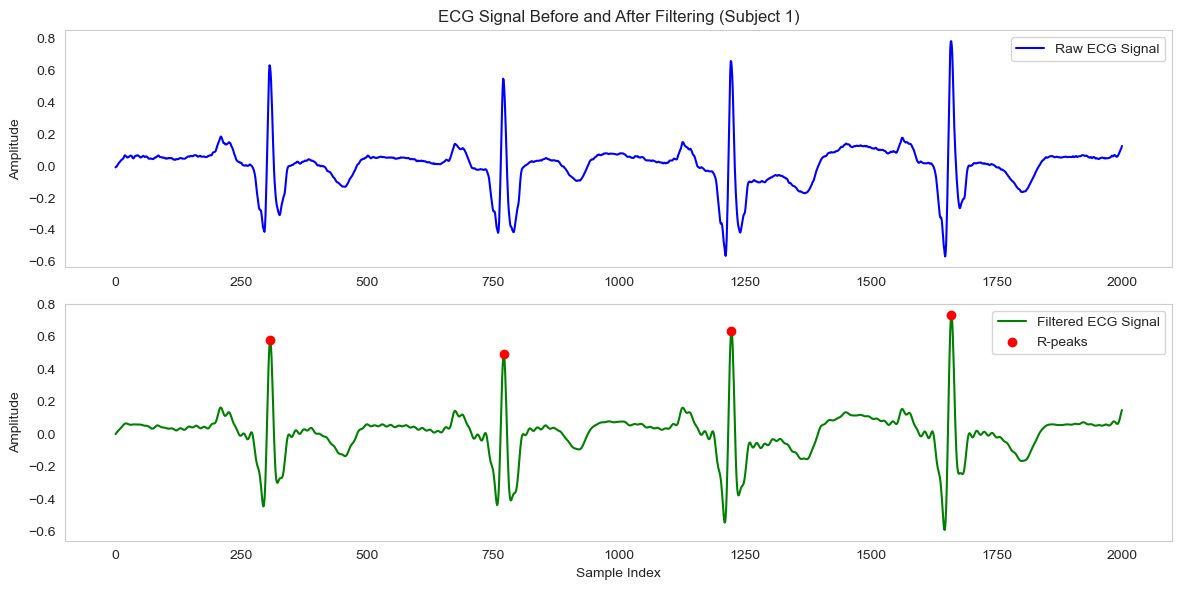

Processing Subject 2...


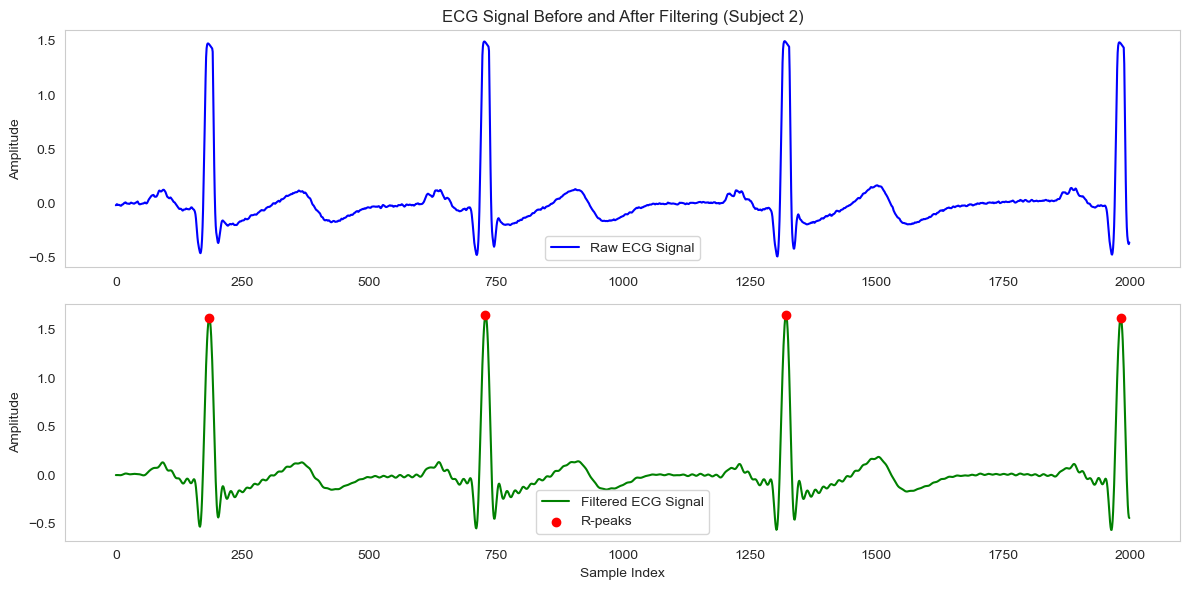

Processing Subject 3...


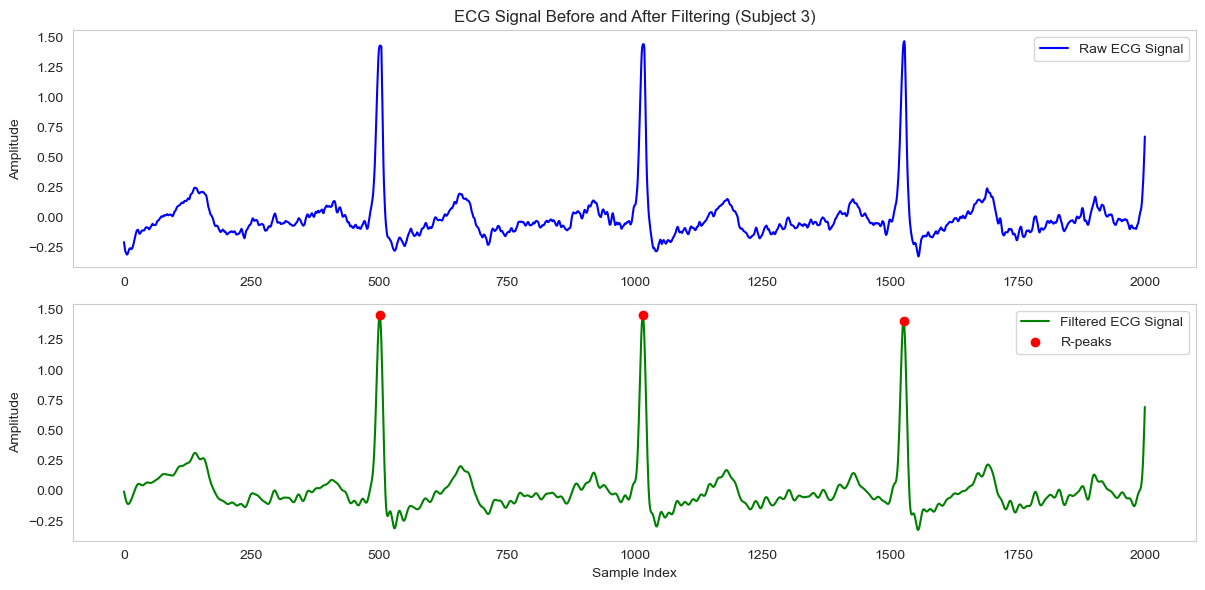

Processing Subject 4...


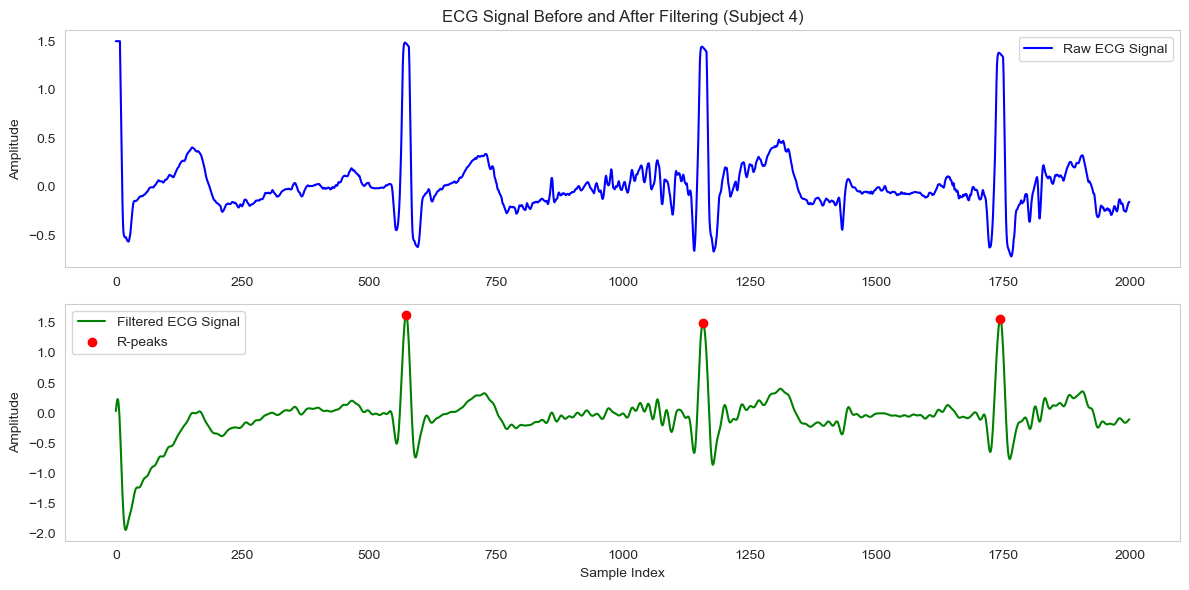

Processing Subject 5...


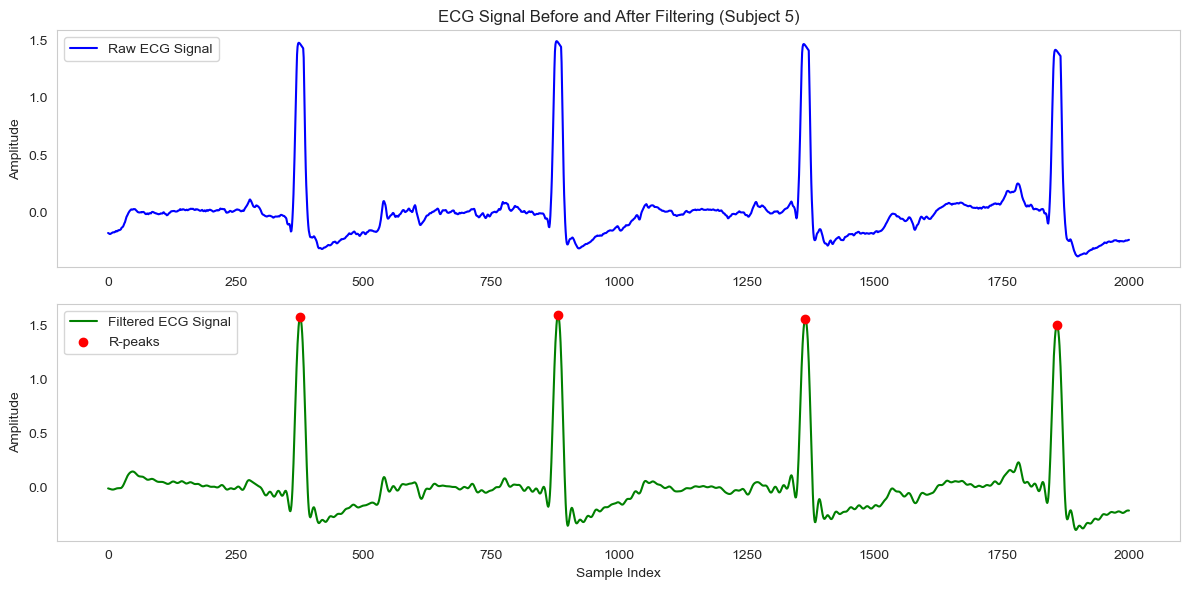

Processing Subject 6...


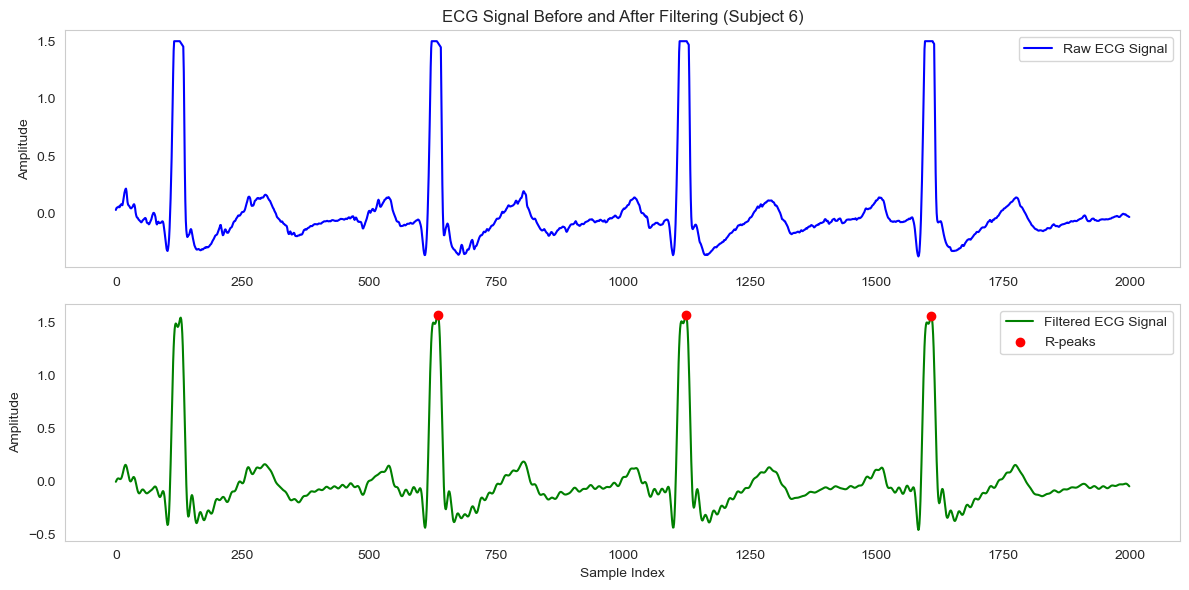

Processing Subject 7...


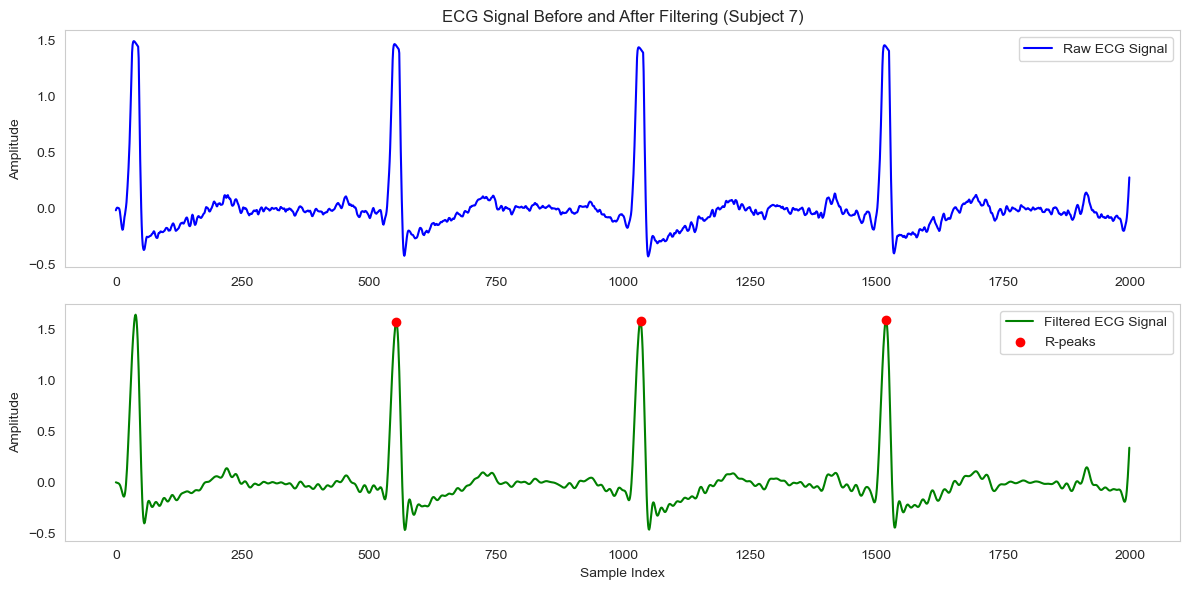

Processing Subject 8...


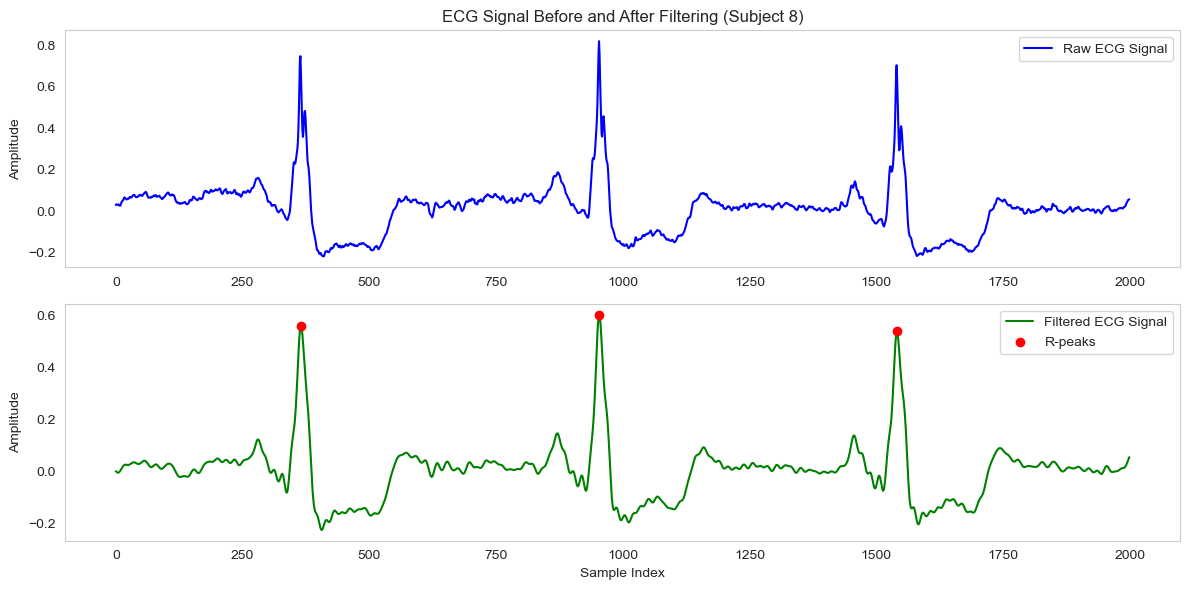

Processing Subject 9...


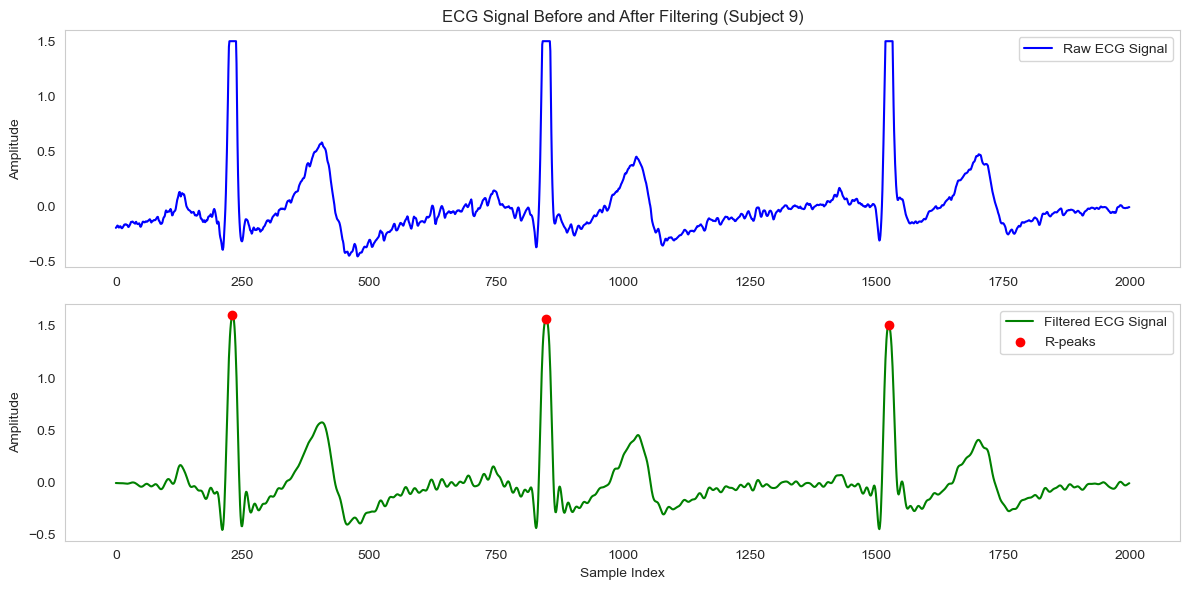

Processing Subject 10...


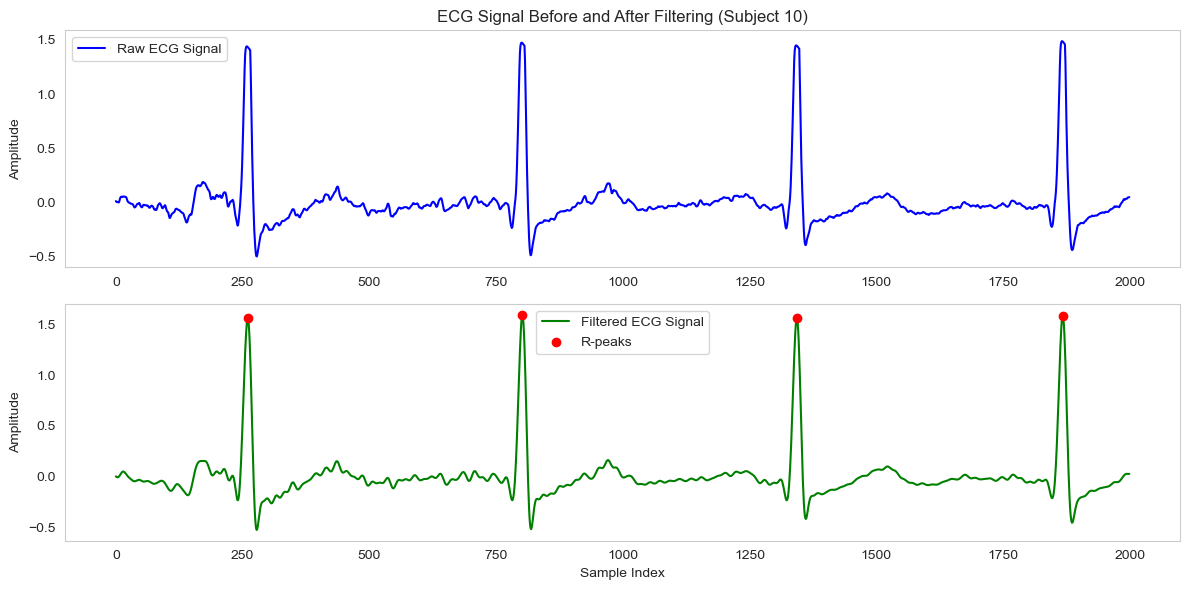

Processing Subject 11...


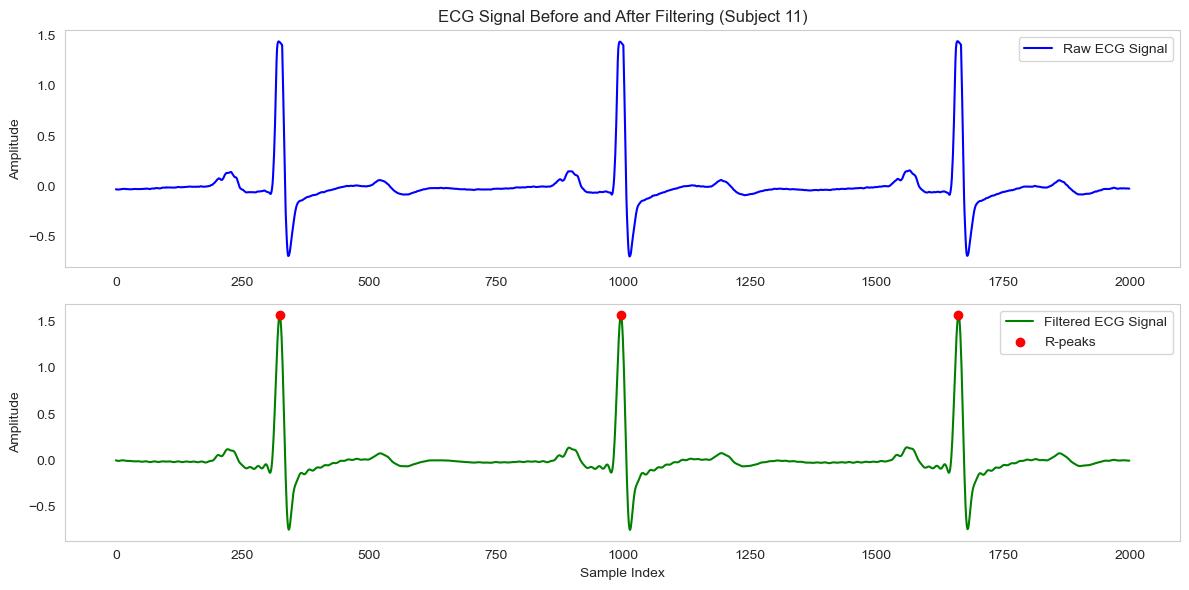

Processing Subject 12...


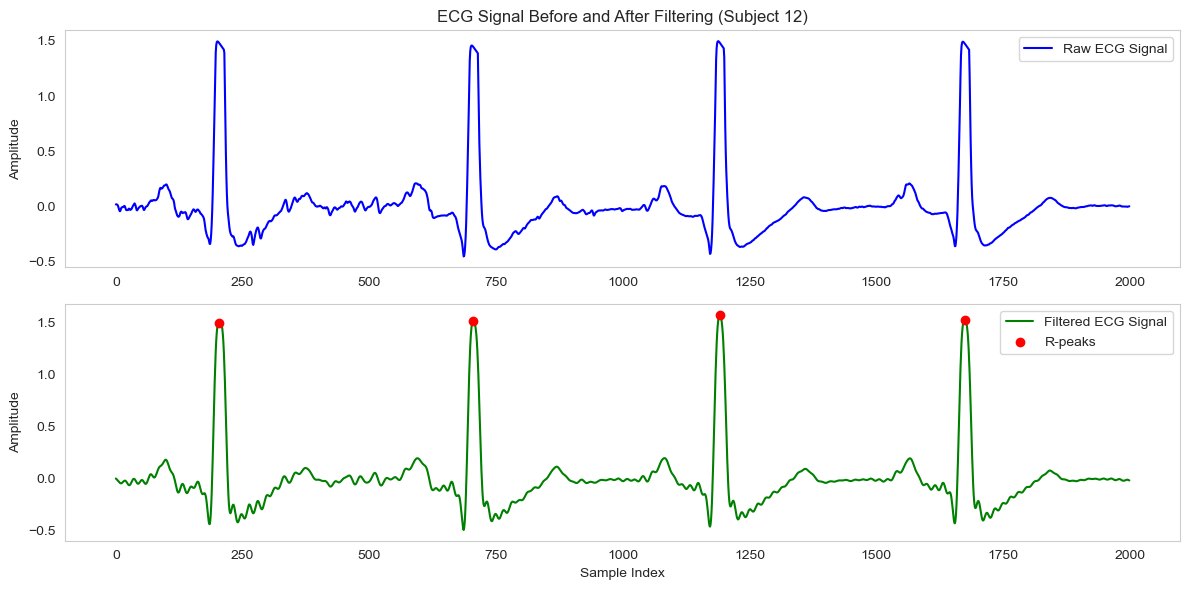

Processing Subject 13...


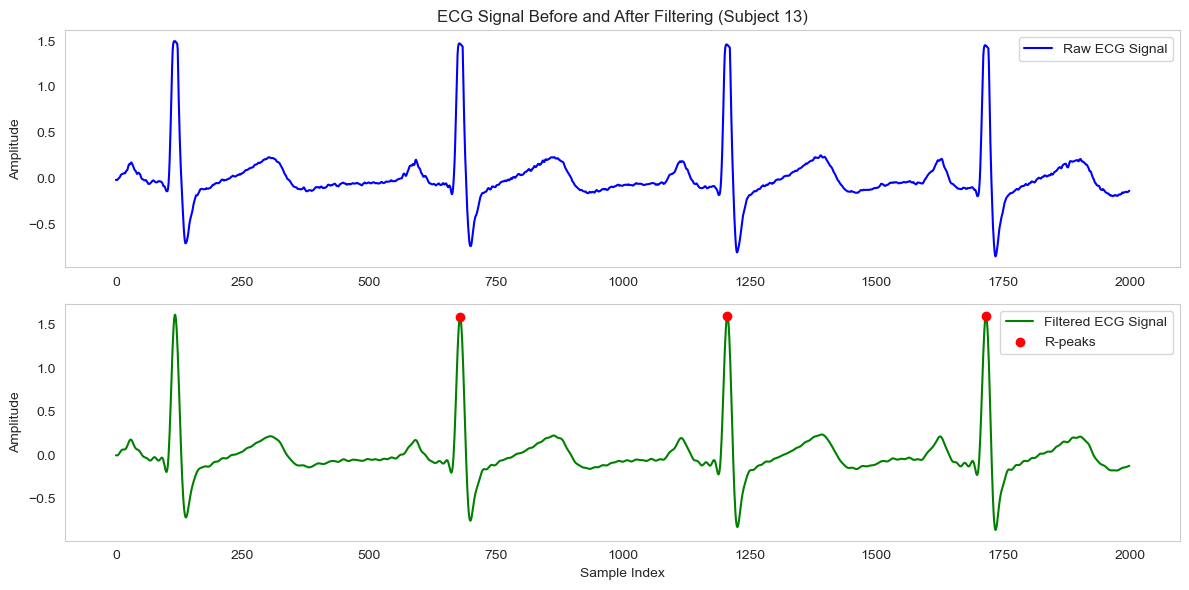

Processing Subject 14...


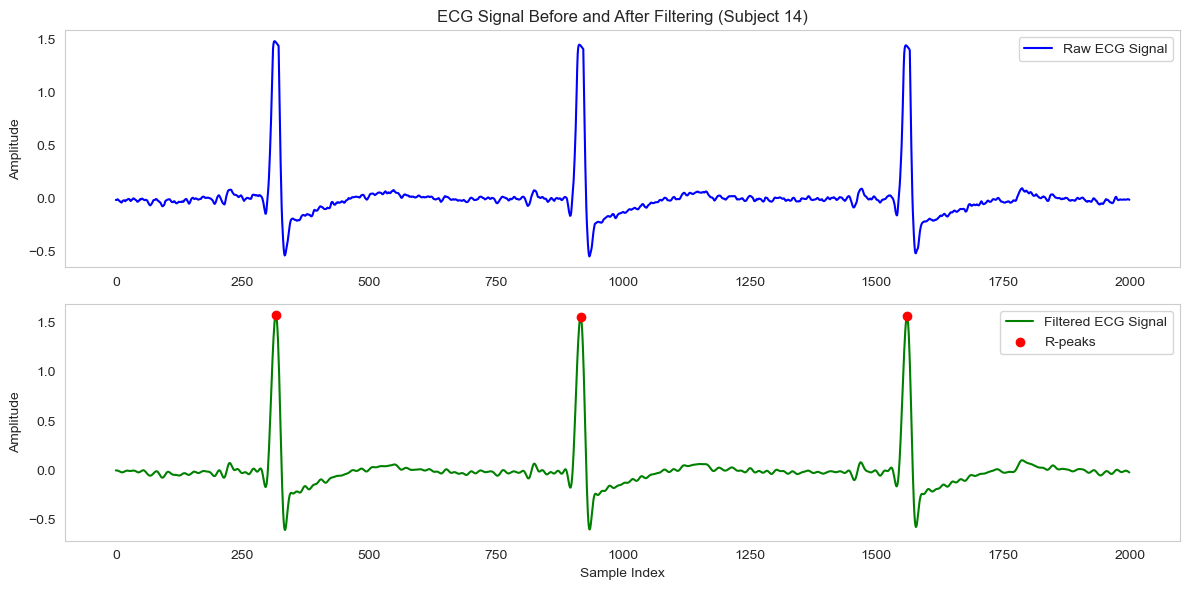

Processing Subject 15...


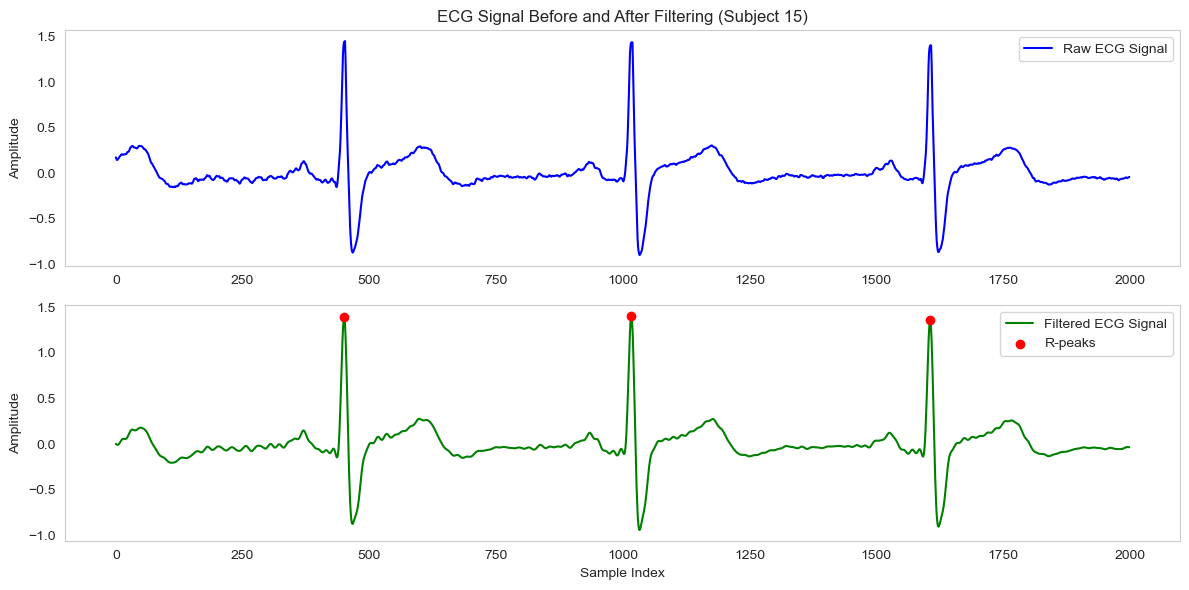

In [37]:
import numpy as np
import biosppy.signals.ecg as ecg
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Function to process ECG signals
def process_ecg_signal(ecg_signal, sampling_rate=700):
    processed = ecg.ecg(signal=ecg_signal, sampling_rate=sampling_rate, show=False)
    filtered_signal = processed["filtered"]
    r_peaks = processed["rpeaks"]
    normalized_signal = zscore(filtered_signal)
    return filtered_signal, r_peaks, normalized_signal

# number of samples for each subject 
num_samples = 2000  

# plot subjects 
for subject_idx, ecg_signal in enumerate(filtered_ecg_signals):
    print(f"Processing Subject {subject_idx+1}...")

    # talking samples from original signal 
    raw_samples = ecg_signal[:num_samples]

    # applying preprocessing 
    filtered_signal, r_peaks, _ = process_ecg_signal(ecg_signal)

    # signals after preprocessing 
    filtered_samples = filtered_signal[:num_samples]

    # specify R peak for samples 
    r_peaks_filtered = [peak for peak in r_peaks if peak < num_samples]

    # plot a comparison orginal signal vs processed signal 
    plt.figure(figsize=(12, 6))

    # original signal 
    plt.subplot(2, 1, 1)
    plt.plot(raw_samples, label="Raw ECG Signal", color='blue')
    plt.title(f"ECG Signal Before and After Filtering (Subject {subject_idx+1})")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()

    # processed signal 
    plt.subplot(2, 1, 2)
    plt.plot(filtered_samples, label="Filtered ECG Signal", color='green')
    plt.scatter(r_peaks_filtered, filtered_samples[r_peaks_filtered], color='red', label="R-peaks", zorder=3)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


**Feature Extraction**

In [129]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import biosppy.signals.ecg as ecg


def extract_rr_intervals(ecg_signal, sampling_rate=700):
    """
    استخراج فواصل RR من إشارة ECG باستخدام قمم R.
    """
    processed = ecg.ecg(signal=ecg_signal, sampling_rate=sampling_rate, show=False)
    r_peaks = processed["rpeaks"]  

    if len(r_peaks) < 2:
        return None  

    rr_intervals = np.diff(r_peaks) * (1000 / sampling_rate)  # تحويل إلى ميلي ثانية
    return rr_intervals


def extract_hr_features(rr_intervals):
    if len(rr_intervals) < 2:
        return None  
    
    rr_intervals_sec = np.array(rr_intervals) / 1000 
    hr_values = 60 / rr_intervals_sec  

    features = {
        "HR_Mean": np.mean(hr_values),
        "HR_Variance": np.var(hr_values),
        "HR_Std": np.std(hr_values),
        "HR_Median": np.median(hr_values),
        "HR_Max": np.max(hr_values),
        "HR_Min": np.min(hr_values),
        "HR_Q1": np.percentile(hr_values, 25),
        "HR_Q3": np.percentile(hr_values, 75),
        "HR_Skewness": skew(hr_values),
        "HR_Kurtosis": kurtosis(hr_values),
        "RR_Mean": np.mean(rr_intervals),
        "HR_SDNN": np.std(rr_intervals),
        "HR_RMSSD": np.sqrt(np.mean(np.diff(rr_intervals) ** 2)),
    }
    return features


feature_data = []


for subject_idx, (ecg_windows, labels) in enumerate(zip(ecg_windows_list, binary_labels_windowed)):
    print(f"Processing Subject {subject_idx+1}...")
    
    for window_idx, (window, label) in enumerate(zip(ecg_windows, labels)):
        rr_intervals = extract_rr_intervals(window) 
        
        if rr_intervals is not None:
            features = extract_hr_features(rr_intervals)
            if features:
                features["Subject_ID"] = subject_idx + 1
                features["Window_ID"] = window_idx + 1
                features["Label"] = label  
                
                feature_data.append(features)


df = pd.DataFrame(feature_data)


df.to_csv("extracted_Features.csv", index=False)

print("Feature extraction completed and saved to 'extracted_features.csv'")


Processing Subject 1...
Processing Subject 2...
Processing Subject 3...
Processing Subject 4...
Processing Subject 5...
Processing Subject 6...
Processing Subject 7...
Processing Subject 8...
Processing Subject 9...
Processing Subject 10...
Processing Subject 11...
Processing Subject 12...
Processing Subject 13...
Processing Subject 14...
Processing Subject 15...
Feature extraction completed and saved to 'extracted_features.csv'


**Post-Extraction Label Verification**

Number of Stress windows: 994
Number of Non-Stress windows: 7251


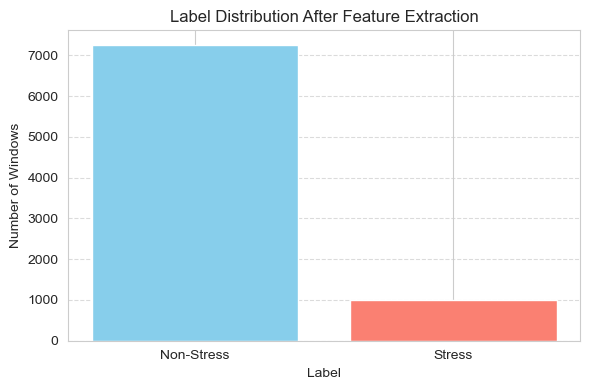

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# تحميل البيانات المحفوظة
df = pd.read_csv("extracted_Features.csv")

# حساب عدد النوافذ لكل تصنيف (سترس وغير سترس)
stress_count = df[df["Label"] == 1].shape[0]
non_stress_count = df[df["Label"] == 0].shape[0]

# طباعة عدد النوافذ لكل تصنيف
print(f"Number of Stress windows: {stress_count}")
print(f"Number of Non-Stress windows: {non_stress_count}")

# رسم هيستوجرام للتوزيع
labels = ['Non-Stress', 'Stress']
counts = [non_stress_count, stress_count]
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=colors)
plt.title('Label Distribution After Feature Extraction')
plt.xlabel('Label')
plt.ylabel('Number of Windows')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**SMOTE Balancing and Visualization**

Number of Stress windows after SMOTE: 7251
Number of Non-Stress windows after SMOTE: 7251
Stress percentage after SMOTE: 50.00%
Non-Stress percentage after SMOTE: 50.00%


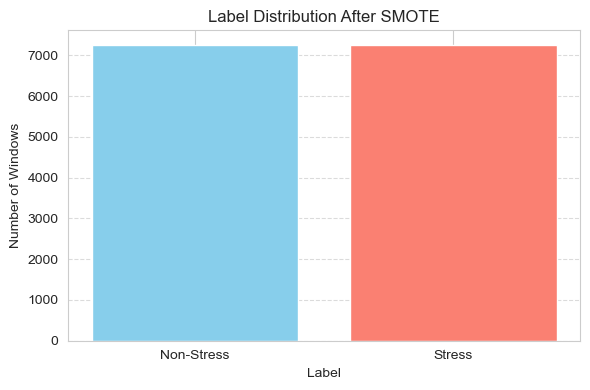

In [43]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Separate features and labels
X = df.drop(columns=["Label", "Subject_ID", "Window_ID"])  # Drop unnecessary columns
y = df["Label"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the number of samples after SMOTE
stress_count_resampled = sum(y_resampled == 1)
non_stress_count_resampled = sum(y_resampled == 0)

# Calculate percentages
stress_percentage_resampled = (stress_count_resampled / len(y_resampled)) * 100
non_stress_percentage_resampled = (non_stress_count_resampled / len(y_resampled)) * 100

# Print results after SMOTE
print(f"Number of Stress windows after SMOTE: {stress_count_resampled}")
print(f"Number of Non-Stress windows after SMOTE: {non_stress_count_resampled}")
print(f"Stress percentage after SMOTE: {stress_percentage_resampled:.2f}%")
print(f"Non-Stress percentage after SMOTE: {non_stress_percentage_resampled:.2f}%")

# Plot histogram for label distribution after SMOTE
labels = ['Non-Stress', 'Stress']
counts = [non_stress_count_resampled, stress_count_resampled]
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=colors)
plt.title('Label Distribution After SMOTE')
plt.xlabel('Label')
plt.ylabel('Number of Windows')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Data Loading and Preparation**

In [45]:
import pandas as pd

# Load the extracted features from CSV
df = pd.read_csv("extracted_Features.csv")

# Drop irrelevant columns to get features
X = df.drop(columns=["Label", "Subject_ID", "Window_ID"])

# Target variable
y = df["Label"]




**Random Forest**

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from tqdm import tqdm  # Import tqdm for progress bar
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store results
y_true = []
y_pred = []

# Leave-One-Subject-Out CV
subjects = df['Subject_ID'].unique()

# Progress bar for the outer loop (subjects)
for subject in tqdm(subjects, desc="Subjects", unit="subject"):
    subject_data = df[df['Subject_ID'] == subject]
    X_subject = subject_data.drop(columns=['Label', 'Subject_ID', 'Window_ID'])
    y_subject = subject_data['Label']

    kf = KFold(n_splits=9, shuffle=True, random_state=42)
    
    # Progress bar for the inner loop (folds)
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_subject), 1):
        print(f"Processing Fold {fold} for Subject {subject}...")
        
        # Split data into train and test sets
        X_train, X_test = X_subject.iloc[train_idx], X_subject.iloc[test_idx]
        y_train, y_test = y_subject.iloc[train_idx], y_subject.iloc[test_idx]

        # Training the model
        rf.fit(X_train, y_train)
        y_pred_single = rf.predict(X_test)

        # Store true and predicted values
        y_true.extend(y_test)
        y_pred.extend(y_pred_single)
        
        # Print progress for each fold
        print(f"Completed Fold {fold} for Subject {subject}.")

print("\nAll subjects and folds processed.")




Subjects:   0%|                                                                            | 0/15 [00:00<?, ?subject/s]

Processing Fold 1 for Subject 1...
Completed Fold 1 for Subject 1.
Processing Fold 2 for Subject 1...
Completed Fold 2 for Subject 1.
Processing Fold 3 for Subject 1...
Completed Fold 3 for Subject 1.
Processing Fold 4 for Subject 1...
Completed Fold 4 for Subject 1.
Processing Fold 5 for Subject 1...
Completed Fold 5 for Subject 1.
Processing Fold 6 for Subject 1...
Completed Fold 6 for Subject 1.
Processing Fold 7 for Subject 1...
Completed Fold 7 for Subject 1.
Processing Fold 8 for Subject 1...
Completed Fold 8 for Subject 1.
Processing Fold 9 for Subject 1...


Subjects:   7%|████▌                                                               | 1/15 [00:01<00:24,  1.77s/subject]

Completed Fold 9 for Subject 1.
Processing Fold 1 for Subject 2...
Completed Fold 1 for Subject 2.
Processing Fold 2 for Subject 2...
Completed Fold 2 for Subject 2.
Processing Fold 3 for Subject 2...
Completed Fold 3 for Subject 2.
Processing Fold 4 for Subject 2...
Completed Fold 4 for Subject 2.
Processing Fold 5 for Subject 2...
Completed Fold 5 for Subject 2.
Processing Fold 6 for Subject 2...
Completed Fold 6 for Subject 2.
Processing Fold 7 for Subject 2...
Completed Fold 7 for Subject 2.
Processing Fold 8 for Subject 2...
Completed Fold 8 for Subject 2.
Processing Fold 9 for Subject 2...


Subjects:  13%|█████████                                                           | 2/15 [00:03<00:21,  1.63s/subject]

Completed Fold 9 for Subject 2.
Processing Fold 1 for Subject 3...
Completed Fold 1 for Subject 3.
Processing Fold 2 for Subject 3...
Completed Fold 2 for Subject 3.
Processing Fold 3 for Subject 3...
Completed Fold 3 for Subject 3.
Processing Fold 4 for Subject 3...
Completed Fold 4 for Subject 3.
Processing Fold 5 for Subject 3...
Completed Fold 5 for Subject 3.
Processing Fold 6 for Subject 3...
Completed Fold 6 for Subject 3.
Processing Fold 7 for Subject 3...
Completed Fold 7 for Subject 3.
Processing Fold 8 for Subject 3...
Completed Fold 8 for Subject 3.
Processing Fold 9 for Subject 3...


Subjects:  20%|█████████████▌                                                      | 3/15 [00:05<00:20,  1.69s/subject]

Completed Fold 9 for Subject 3.
Processing Fold 1 for Subject 4...
Completed Fold 1 for Subject 4.
Processing Fold 2 for Subject 4...
Completed Fold 2 for Subject 4.
Processing Fold 3 for Subject 4...
Completed Fold 3 for Subject 4.
Processing Fold 4 for Subject 4...
Completed Fold 4 for Subject 4.
Processing Fold 5 for Subject 4...
Completed Fold 5 for Subject 4.
Processing Fold 6 for Subject 4...
Completed Fold 6 for Subject 4.
Processing Fold 7 for Subject 4...
Completed Fold 7 for Subject 4.
Processing Fold 8 for Subject 4...
Completed Fold 8 for Subject 4.
Processing Fold 9 for Subject 4...


Subjects:  27%|██████████████████▏                                                 | 4/15 [00:06<00:18,  1.67s/subject]

Completed Fold 9 for Subject 4.
Processing Fold 1 for Subject 5...
Completed Fold 1 for Subject 5.
Processing Fold 2 for Subject 5...
Completed Fold 2 for Subject 5.
Processing Fold 3 for Subject 5...
Completed Fold 3 for Subject 5.
Processing Fold 4 for Subject 5...
Completed Fold 4 for Subject 5.
Processing Fold 5 for Subject 5...
Completed Fold 5 for Subject 5.
Processing Fold 6 for Subject 5...
Completed Fold 6 for Subject 5.
Processing Fold 7 for Subject 5...
Completed Fold 7 for Subject 5.
Processing Fold 8 for Subject 5...


Subjects:  33%|██████████████████████▋                                             | 5/15 [00:08<00:16,  1.66s/subject]

Completed Fold 8 for Subject 5.
Processing Fold 9 for Subject 5...
Completed Fold 9 for Subject 5.
Processing Fold 1 for Subject 6...
Completed Fold 1 for Subject 6.
Processing Fold 2 for Subject 6...
Completed Fold 2 for Subject 6.
Processing Fold 3 for Subject 6...
Completed Fold 3 for Subject 6.
Processing Fold 4 for Subject 6...
Completed Fold 4 for Subject 6.
Processing Fold 5 for Subject 6...
Completed Fold 5 for Subject 6.
Processing Fold 6 for Subject 6...
Completed Fold 6 for Subject 6.
Processing Fold 7 for Subject 6...
Completed Fold 7 for Subject 6.
Processing Fold 8 for Subject 6...
Completed Fold 8 for Subject 6.
Processing Fold 9 for Subject 6...


Subjects:  40%|███████████████████████████▏                                        | 6/15 [00:09<00:14,  1.64s/subject]

Completed Fold 9 for Subject 6.
Processing Fold 1 for Subject 7...
Completed Fold 1 for Subject 7.
Processing Fold 2 for Subject 7...
Completed Fold 2 for Subject 7.
Processing Fold 3 for Subject 7...
Completed Fold 3 for Subject 7.
Processing Fold 4 for Subject 7...
Completed Fold 4 for Subject 7.
Processing Fold 5 for Subject 7...
Completed Fold 5 for Subject 7.
Processing Fold 6 for Subject 7...
Completed Fold 6 for Subject 7.
Processing Fold 7 for Subject 7...
Completed Fold 7 for Subject 7.
Processing Fold 8 for Subject 7...


Subjects:  47%|███████████████████████████████▋                                    | 7/15 [00:11<00:13,  1.71s/subject]

Completed Fold 8 for Subject 7.
Processing Fold 9 for Subject 7...
Completed Fold 9 for Subject 7.
Processing Fold 1 for Subject 8...
Completed Fold 1 for Subject 8.
Processing Fold 2 for Subject 8...
Completed Fold 2 for Subject 8.
Processing Fold 3 for Subject 8...
Completed Fold 3 for Subject 8.
Processing Fold 4 for Subject 8...
Completed Fold 4 for Subject 8.
Processing Fold 5 for Subject 8...
Completed Fold 5 for Subject 8.
Processing Fold 6 for Subject 8...
Completed Fold 6 for Subject 8.
Processing Fold 7 for Subject 8...
Completed Fold 7 for Subject 8.
Processing Fold 8 for Subject 8...
Completed Fold 8 for Subject 8.
Processing Fold 9 for Subject 8...


Subjects:  53%|████████████████████████████████████▎                               | 8/15 [00:13<00:12,  1.77s/subject]

Completed Fold 9 for Subject 8.
Processing Fold 1 for Subject 9...
Completed Fold 1 for Subject 9.
Processing Fold 2 for Subject 9...
Completed Fold 2 for Subject 9.
Processing Fold 3 for Subject 9...
Completed Fold 3 for Subject 9.
Processing Fold 4 for Subject 9...
Completed Fold 4 for Subject 9.
Processing Fold 5 for Subject 9...
Completed Fold 5 for Subject 9.
Processing Fold 6 for Subject 9...
Completed Fold 6 for Subject 9.
Processing Fold 7 for Subject 9...
Completed Fold 7 for Subject 9.
Processing Fold 8 for Subject 9...


Subjects:  60%|████████████████████████████████████████▊                           | 9/15 [00:15<00:10,  1.72s/subject]

Completed Fold 8 for Subject 9.
Processing Fold 9 for Subject 9...
Completed Fold 9 for Subject 9.
Processing Fold 1 for Subject 10...
Completed Fold 1 for Subject 10.
Processing Fold 2 for Subject 10...
Completed Fold 2 for Subject 10.
Processing Fold 3 for Subject 10...
Completed Fold 3 for Subject 10.
Processing Fold 4 for Subject 10...
Completed Fold 4 for Subject 10.
Processing Fold 5 for Subject 10...
Completed Fold 5 for Subject 10.
Processing Fold 6 for Subject 10...
Completed Fold 6 for Subject 10.
Processing Fold 7 for Subject 10...
Completed Fold 7 for Subject 10.
Processing Fold 8 for Subject 10...
Completed Fold 8 for Subject 10.
Processing Fold 9 for Subject 10...


Subjects:  67%|████████████████████████████████████████████▋                      | 10/15 [00:16<00:07,  1.58s/subject]

Completed Fold 9 for Subject 10.
Processing Fold 1 for Subject 11...
Completed Fold 1 for Subject 11.
Processing Fold 2 for Subject 11...
Completed Fold 2 for Subject 11.
Processing Fold 3 for Subject 11...
Completed Fold 3 for Subject 11.
Processing Fold 4 for Subject 11...
Completed Fold 4 for Subject 11.
Processing Fold 5 for Subject 11...
Completed Fold 5 for Subject 11.
Processing Fold 6 for Subject 11...
Completed Fold 6 for Subject 11.
Processing Fold 7 for Subject 11...
Completed Fold 7 for Subject 11.
Processing Fold 8 for Subject 11...
Completed Fold 8 for Subject 11.
Processing Fold 9 for Subject 11...


Subjects:  73%|█████████████████████████████████████████████████▏                 | 11/15 [00:18<00:06,  1.66s/subject]

Completed Fold 9 for Subject 11.
Processing Fold 1 for Subject 12...
Completed Fold 1 for Subject 12.
Processing Fold 2 for Subject 12...
Completed Fold 2 for Subject 12.
Processing Fold 3 for Subject 12...
Completed Fold 3 for Subject 12.
Processing Fold 4 for Subject 12...
Completed Fold 4 for Subject 12.
Processing Fold 5 for Subject 12...
Completed Fold 5 for Subject 12.
Processing Fold 6 for Subject 12...
Completed Fold 6 for Subject 12.
Processing Fold 7 for Subject 12...
Completed Fold 7 for Subject 12.
Processing Fold 8 for Subject 12...
Completed Fold 8 for Subject 12.
Processing Fold 9 for Subject 12...


Subjects:  80%|█████████████████████████████████████████████████████▌             | 12/15 [00:20<00:05,  1.71s/subject]

Completed Fold 9 for Subject 12.
Processing Fold 1 for Subject 13...
Completed Fold 1 for Subject 13.
Processing Fold 2 for Subject 13...
Completed Fold 2 for Subject 13.
Processing Fold 3 for Subject 13...
Completed Fold 3 for Subject 13.
Processing Fold 4 for Subject 13...
Completed Fold 4 for Subject 13.
Processing Fold 5 for Subject 13...
Completed Fold 5 for Subject 13.
Processing Fold 6 for Subject 13...
Completed Fold 6 for Subject 13.
Processing Fold 7 for Subject 13...
Completed Fold 7 for Subject 13.
Processing Fold 8 for Subject 13...
Completed Fold 8 for Subject 13.
Processing Fold 9 for Subject 13...


Subjects:  87%|██████████████████████████████████████████████████████████         | 13/15 [00:22<00:03,  1.74s/subject]

Completed Fold 9 for Subject 13.
Processing Fold 1 for Subject 14...
Completed Fold 1 for Subject 14.
Processing Fold 2 for Subject 14...
Completed Fold 2 for Subject 14.
Processing Fold 3 for Subject 14...
Completed Fold 3 for Subject 14.
Processing Fold 4 for Subject 14...
Completed Fold 4 for Subject 14.
Processing Fold 5 for Subject 14...
Completed Fold 5 for Subject 14.
Processing Fold 6 for Subject 14...
Completed Fold 6 for Subject 14.
Processing Fold 7 for Subject 14...
Completed Fold 7 for Subject 14.
Processing Fold 8 for Subject 14...


Subjects:  93%|██████████████████████████████████████████████████████████████▌    | 14/15 [00:23<00:01,  1.67s/subject]

Completed Fold 8 for Subject 14.
Processing Fold 9 for Subject 14...
Completed Fold 9 for Subject 14.
Processing Fold 1 for Subject 15...
Completed Fold 1 for Subject 15.
Processing Fold 2 for Subject 15...
Completed Fold 2 for Subject 15.
Processing Fold 3 for Subject 15...
Completed Fold 3 for Subject 15.
Processing Fold 4 for Subject 15...
Completed Fold 4 for Subject 15.
Processing Fold 5 for Subject 15...
Completed Fold 5 for Subject 15.
Processing Fold 6 for Subject 15...
Completed Fold 6 for Subject 15.
Processing Fold 7 for Subject 15...
Completed Fold 7 for Subject 15.
Processing Fold 8 for Subject 15...
Completed Fold 8 for Subject 15.
Processing Fold 9 for Subject 15...


Subjects: 100%|███████████████████████████████████████████████████████████████████| 15/15 [00:25<00:00,  1.69s/subject]

Completed Fold 9 for Subject 15.

All subjects and folds processed.


Evaluating the model...

Classification Report:
              precision    recall  f1-score      support
0.0            0.996009  0.998207  0.997107  7251.000000
1.0            0.986708  0.970825  0.978702   994.000000
accuracy       0.994906  0.994906  0.994906     0.994906
macro avg      0.991358  0.984516  0.987904  8245.000000
weighted avg   0.994888  0.994906  0.994888  8245.000000

Confusion Matrix:
         Class 0  Class 1
Class 0     7238       13
Class 1       29      965


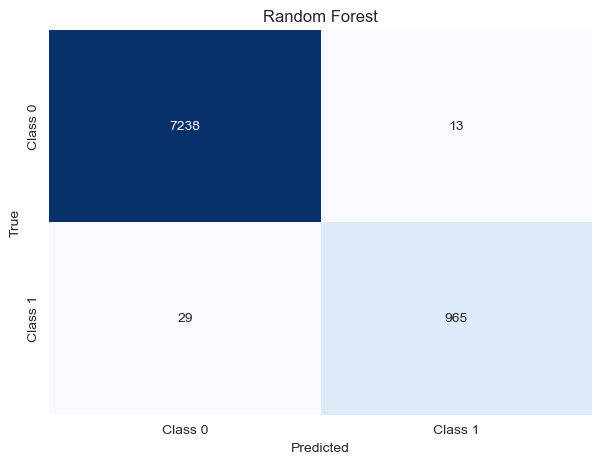


Final Accuracy: 0.9949


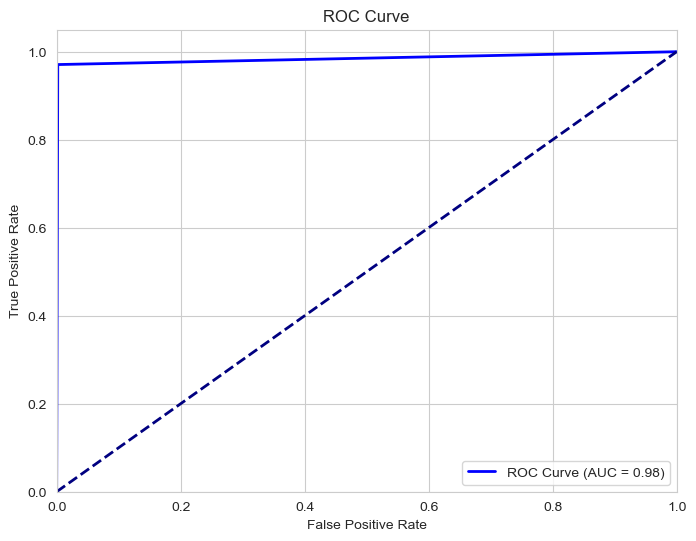

In [76]:
print("Evaluating the model...")
report = classification_report(y_true, y_pred, output_dict=True, zero_division=1)


report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)


cm = confusion_matrix(y_true, y_pred)


cm_df = pd.DataFrame(cm, index=['Class 0', 'Class 1'], columns=['Class 0', 'Class 1'])
print("\nConfusion Matrix:")
print(cm_df)


plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest')
plt.show()


accuracy = (np.array(y_true) == np.array(y_pred)).mean()
print(f"\nFinal Accuracy: {accuracy:.4f}")





roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # الخط المرجعي (خط عشوائي)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**XG Boost Classifier**

Subjects:   0%|                                                                            | 0/15 [00:00<?, ?subject/s]

Processing Fold 1 for Subject 1...
Completed Fold 1 for Subject 1.
Processing Fold 2 for Subject 1...
Completed Fold 2 for Subject 1.
Processing Fold 3 for Subject 1...
Completed Fold 3 for Subject 1.
Processing Fold 4 for Subject 1...
Completed Fold 4 for Subject 1.
Processing Fold 5 for Subject 1...
Completed Fold 5 for Subject 1.
Processing Fold 6 for Subject 1...
Completed Fold 6 for Subject 1.
Processing Fold 7 for Subject 1...
Completed Fold 7 for Subject 1.
Processing Fold 8 for Subject 1...
Completed Fold 8 for Subject 1.
Processing Fold 9 for Subject 1...


Subjects:   7%|████▌                                                               | 1/15 [00:00<00:10,  1.31subject/s]

Completed Fold 9 for Subject 1.
Processing Fold 1 for Subject 2...
Completed Fold 1 for Subject 2.
Processing Fold 2 for Subject 2...
Completed Fold 2 for Subject 2.
Processing Fold 3 for Subject 2...
Completed Fold 3 for Subject 2.
Processing Fold 4 for Subject 2...
Completed Fold 4 for Subject 2.
Processing Fold 5 for Subject 2...
Completed Fold 5 for Subject 2.
Processing Fold 6 for Subject 2...
Completed Fold 6 for Subject 2.
Processing Fold 7 for Subject 2...
Completed Fold 7 for Subject 2.
Processing Fold 8 for Subject 2...
Completed Fold 8 for Subject 2.
Processing Fold 9 for Subject 2...


Subjects:  13%|█████████                                                           | 2/15 [00:01<00:09,  1.38subject/s]

Completed Fold 9 for Subject 2.
Processing Fold 1 for Subject 3...
Completed Fold 1 for Subject 3.
Processing Fold 2 for Subject 3...
Completed Fold 2 for Subject 3.
Processing Fold 3 for Subject 3...
Completed Fold 3 for Subject 3.
Processing Fold 4 for Subject 3...
Completed Fold 4 for Subject 3.
Processing Fold 5 for Subject 3...
Completed Fold 5 for Subject 3.
Processing Fold 6 for Subject 3...
Completed Fold 6 for Subject 3.
Processing Fold 7 for Subject 3...
Completed Fold 7 for Subject 3.
Processing Fold 8 for Subject 3...
Completed Fold 8 for Subject 3.
Processing Fold 9 for Subject 3...


Subjects:  20%|█████████████▌                                                      | 3/15 [00:02<00:08,  1.39subject/s]

Completed Fold 9 for Subject 3.
Processing Fold 1 for Subject 4...
Completed Fold 1 for Subject 4.
Processing Fold 2 for Subject 4...
Completed Fold 2 for Subject 4.
Processing Fold 3 for Subject 4...
Completed Fold 3 for Subject 4.
Processing Fold 4 for Subject 4...
Completed Fold 4 for Subject 4.
Processing Fold 5 for Subject 4...
Completed Fold 5 for Subject 4.
Processing Fold 6 for Subject 4...
Completed Fold 6 for Subject 4.
Processing Fold 7 for Subject 4...
Completed Fold 7 for Subject 4.
Processing Fold 8 for Subject 4...
Completed Fold 8 for Subject 4.
Processing Fold 9 for Subject 4...


Subjects:  27%|██████████████████▏                                                 | 4/15 [00:02<00:07,  1.41subject/s]

Completed Fold 9 for Subject 4.
Processing Fold 1 for Subject 5...
Completed Fold 1 for Subject 5.
Processing Fold 2 for Subject 5...
Completed Fold 2 for Subject 5.
Processing Fold 3 for Subject 5...
Completed Fold 3 for Subject 5.
Processing Fold 4 for Subject 5...
Completed Fold 4 for Subject 5.
Processing Fold 5 for Subject 5...
Completed Fold 5 for Subject 5.
Processing Fold 6 for Subject 5...
Completed Fold 6 for Subject 5.
Processing Fold 7 for Subject 5...
Completed Fold 7 for Subject 5.
Processing Fold 8 for Subject 5...
Completed Fold 8 for Subject 5.
Processing Fold 9 for Subject 5...


Subjects:  33%|██████████████████████▋                                             | 5/15 [00:03<00:07,  1.37subject/s]

Completed Fold 9 for Subject 5.
Processing Fold 1 for Subject 6...
Completed Fold 1 for Subject 6.
Processing Fold 2 for Subject 6...
Completed Fold 2 for Subject 6.
Processing Fold 3 for Subject 6...
Completed Fold 3 for Subject 6.
Processing Fold 4 for Subject 6...
Completed Fold 4 for Subject 6.
Processing Fold 5 for Subject 6...
Completed Fold 5 for Subject 6.
Processing Fold 6 for Subject 6...
Completed Fold 6 for Subject 6.
Processing Fold 7 for Subject 6...


Subjects:  40%|███████████████████████████▏                                        | 6/15 [00:04<00:06,  1.29subject/s]

Completed Fold 7 for Subject 6.
Processing Fold 8 for Subject 6...
Completed Fold 8 for Subject 6.
Processing Fold 9 for Subject 6...
Completed Fold 9 for Subject 6.
Processing Fold 1 for Subject 7...
Completed Fold 1 for Subject 7.
Processing Fold 2 for Subject 7...
Completed Fold 2 for Subject 7.
Processing Fold 3 for Subject 7...
Completed Fold 3 for Subject 7.
Processing Fold 4 for Subject 7...
Completed Fold 4 for Subject 7.
Processing Fold 5 for Subject 7...
Completed Fold 5 for Subject 7.
Processing Fold 6 for Subject 7...


Subjects:  47%|███████████████████████████████▋                                    | 7/15 [00:05<00:05,  1.35subject/s]

Completed Fold 6 for Subject 7.
Processing Fold 7 for Subject 7...
Completed Fold 7 for Subject 7.
Processing Fold 8 for Subject 7...
Completed Fold 8 for Subject 7.
Processing Fold 9 for Subject 7...
Completed Fold 9 for Subject 7.
Processing Fold 1 for Subject 8...
Completed Fold 1 for Subject 8.
Processing Fold 2 for Subject 8...
Completed Fold 2 for Subject 8.
Processing Fold 3 for Subject 8...
Completed Fold 3 for Subject 8.
Processing Fold 4 for Subject 8...
Completed Fold 4 for Subject 8.
Processing Fold 5 for Subject 8...
Completed Fold 5 for Subject 8.
Processing Fold 6 for Subject 8...
Completed Fold 6 for Subject 8.
Processing Fold 7 for Subject 8...
Completed Fold 7 for Subject 8.
Processing Fold 8 for Subject 8...


Subjects:  53%|████████████████████████████████████▎                               | 8/15 [00:05<00:04,  1.40subject/s]

Completed Fold 8 for Subject 8.
Processing Fold 9 for Subject 8...
Completed Fold 9 for Subject 8.
Processing Fold 1 for Subject 9...
Completed Fold 1 for Subject 9.
Processing Fold 2 for Subject 9...
Completed Fold 2 for Subject 9.
Processing Fold 3 for Subject 9...
Completed Fold 3 for Subject 9.
Processing Fold 4 for Subject 9...
Completed Fold 4 for Subject 9.
Processing Fold 5 for Subject 9...
Completed Fold 5 for Subject 9.
Processing Fold 6 for Subject 9...
Completed Fold 6 for Subject 9.
Processing Fold 7 for Subject 9...


Subjects:  60%|████████████████████████████████████████▊                           | 9/15 [00:06<00:03,  1.50subject/s]

Completed Fold 7 for Subject 9.
Processing Fold 8 for Subject 9...
Completed Fold 8 for Subject 9.
Processing Fold 9 for Subject 9...
Completed Fold 9 for Subject 9.
Processing Fold 1 for Subject 10...
Completed Fold 1 for Subject 10.
Processing Fold 2 for Subject 10...
Completed Fold 2 for Subject 10.
Processing Fold 3 for Subject 10...
Completed Fold 3 for Subject 10.
Processing Fold 4 for Subject 10...
Completed Fold 4 for Subject 10.
Processing Fold 5 for Subject 10...
Completed Fold 5 for Subject 10.
Processing Fold 6 for Subject 10...
Completed Fold 6 for Subject 10.
Processing Fold 7 for Subject 10...
Completed Fold 7 for Subject 10.
Processing Fold 8 for Subject 10...
Completed Fold 8 for Subject 10.
Processing Fold 9 for Subject 10...


Subjects:  67%|████████████████████████████████████████████▋                      | 10/15 [00:07<00:03,  1.50subject/s]

Completed Fold 9 for Subject 10.
Processing Fold 1 for Subject 11...
Completed Fold 1 for Subject 11.
Processing Fold 2 for Subject 11...
Completed Fold 2 for Subject 11.
Processing Fold 3 for Subject 11...
Completed Fold 3 for Subject 11.
Processing Fold 4 for Subject 11...
Completed Fold 4 for Subject 11.
Processing Fold 5 for Subject 11...
Completed Fold 5 for Subject 11.
Processing Fold 6 for Subject 11...
Completed Fold 6 for Subject 11.
Processing Fold 7 for Subject 11...
Completed Fold 7 for Subject 11.
Processing Fold 8 for Subject 11...
Completed Fold 8 for Subject 11.
Processing Fold 9 for Subject 11...


Subjects:  73%|█████████████████████████████████████████████████▏                 | 11/15 [00:07<00:02,  1.47subject/s]

Completed Fold 9 for Subject 11.
Processing Fold 1 for Subject 12...
Completed Fold 1 for Subject 12.
Processing Fold 2 for Subject 12...
Completed Fold 2 for Subject 12.
Processing Fold 3 for Subject 12...
Completed Fold 3 for Subject 12.
Processing Fold 4 for Subject 12...
Completed Fold 4 for Subject 12.
Processing Fold 5 for Subject 12...
Completed Fold 5 for Subject 12.
Processing Fold 6 for Subject 12...


Subjects:  80%|█████████████████████████████████████████████████████▌             | 12/15 [00:08<00:02,  1.50subject/s]

Completed Fold 6 for Subject 12.
Processing Fold 7 for Subject 12...
Completed Fold 7 for Subject 12.
Processing Fold 8 for Subject 12...
Completed Fold 8 for Subject 12.
Processing Fold 9 for Subject 12...
Completed Fold 9 for Subject 12.
Processing Fold 1 for Subject 13...
Completed Fold 1 for Subject 13.
Processing Fold 2 for Subject 13...
Completed Fold 2 for Subject 13.
Processing Fold 3 for Subject 13...
Completed Fold 3 for Subject 13.
Processing Fold 4 for Subject 13...
Completed Fold 4 for Subject 13.
Processing Fold 5 for Subject 13...
Completed Fold 5 for Subject 13.
Processing Fold 6 for Subject 13...
Completed Fold 6 for Subject 13.
Processing Fold 7 for Subject 13...
Completed Fold 7 for Subject 13.
Processing Fold 8 for Subject 13...
Completed Fold 8 for Subject 13.
Processing Fold 9 for Subject 13...


Subjects:  87%|██████████████████████████████████████████████████████████         | 13/15 [00:09<00:01,  1.47subject/s]

Completed Fold 9 for Subject 13.
Processing Fold 1 for Subject 14...
Completed Fold 1 for Subject 14.
Processing Fold 2 for Subject 14...
Completed Fold 2 for Subject 14.
Processing Fold 3 for Subject 14...
Completed Fold 3 for Subject 14.
Processing Fold 4 for Subject 14...
Completed Fold 4 for Subject 14.
Processing Fold 5 for Subject 14...
Completed Fold 5 for Subject 14.
Processing Fold 6 for Subject 14...
Completed Fold 6 for Subject 14.
Processing Fold 7 for Subject 14...
Completed Fold 7 for Subject 14.
Processing Fold 8 for Subject 14...
Completed Fold 8 for Subject 14.
Processing Fold 9 for Subject 14...


Subjects:  93%|██████████████████████████████████████████████████████████████▌    | 14/15 [00:09<00:00,  1.45subject/s]

Completed Fold 9 for Subject 14.
Processing Fold 1 for Subject 15...
Completed Fold 1 for Subject 15.
Processing Fold 2 for Subject 15...
Completed Fold 2 for Subject 15.
Processing Fold 3 for Subject 15...
Completed Fold 3 for Subject 15.
Processing Fold 4 for Subject 15...
Completed Fold 4 for Subject 15.
Processing Fold 5 for Subject 15...
Completed Fold 5 for Subject 15.
Processing Fold 6 for Subject 15...
Completed Fold 6 for Subject 15.
Processing Fold 7 for Subject 15...
Completed Fold 7 for Subject 15.
Processing Fold 8 for Subject 15...
Completed Fold 8 for Subject 15.
Processing Fold 9 for Subject 15...


Subjects: 100%|███████████████████████████████████████████████████████████████████| 15/15 [00:10<00:00,  1.41subject/s]

Completed Fold 9 for Subject 15.

All subjects and folds processed.

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7251
         1.0       0.98      0.96      0.97       994

    accuracy                           0.99      8245
   macro avg       0.99      0.98      0.98      8245
weighted avg       0.99      0.99      0.99      8245



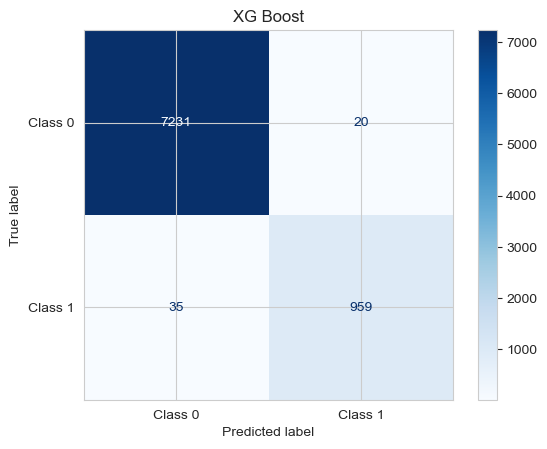

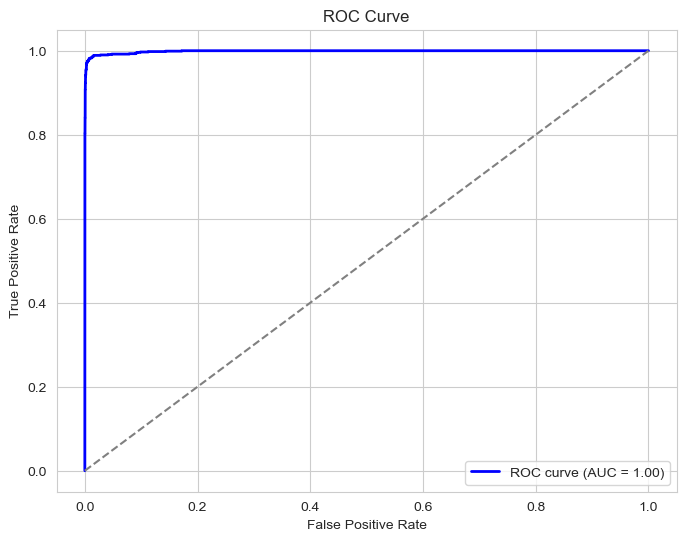

In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the model
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')

# Lists to store results
y_true = []
y_pred = []
y_score = []  # For ROC curve

# Leave-One-Subject-Out CV
subjects = df['Subject_ID'].unique()

for subject in tqdm(subjects, desc="Subjects", unit="subject"):
    subject_data = df[df['Subject_ID'] == subject]
    X_subject = subject_data.drop(columns=['Label', 'Subject_ID', 'Window_ID'])
    y_subject = subject_data['Label']

    kf = KFold(n_splits=9, shuffle=True, random_state=42)

    for fold, (train_idx, test_idx) in enumerate(kf.split(X_subject), 1):
        print(f"Processing Fold {fold} for Subject {subject}...")
        
        X_train, X_test = X_subject.iloc[train_idx], X_subject.iloc[test_idx]
        y_train, y_test = y_subject.iloc[train_idx], y_subject.iloc[test_idx]

        # Training the model
        xgb.fit(X_train, y_train)

        # Predict labels and probabilities
        y_pred_single = xgb.predict(X_test)
        y_prob_single = xgb.predict_proba(X_test)[:, 1]

        y_true.extend(y_test)
        y_pred.extend(y_pred_single)
        y_score.extend(y_prob_single)

        print(f"Completed Fold {fold} for Subject {subject}.")

print("\nAll subjects and folds processed.")

# Evaluation
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap="Blues", values_format="d")
plt.title("XG Boost")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
